[9.86587645e-10 1.81750786e-09 3.31574598e-09 5.99037140e-09
 1.07175903e-08 1.89895625e-08 3.33204485e-08 5.79013404e-08
 9.96442632e-08 1.69826741e-07]
[6.07588285e-10 1.70916465e-09 3.68648429e-09 7.20043938e-09
 1.33830599e-08 2.41528199e-08 4.27264384e-08 7.44399305e-08
 1.28050284e-07 2.17774636e-07]
[6.07588285e-10 1.70916465e-09 3.68648429e-09 7.20043938e-09
 1.33830599e-08 2.41528199e-08 4.27264384e-08 7.44399305e-08
 1.28050284e-07 2.17774636e-07]
[0.00000000e+00 8.54582324e-10 2.39403033e-09 5.13966769e-09
 9.98795549e-09 1.84641458e-08 3.31358350e-08 5.82793903e-08
 1.00941313e-07 1.72608666e-07]
[0.00000000e+00 0.00000000e+00 1.53944800e-09 4.28508537e-09
 9.13337317e-09 1.76095634e-08 3.22812527e-08 5.74248080e-08
 1.00086731e-07 1.71754083e-07]
[-2.46994039e-10  1.10157636e-09  2.14703629e-09  4.89267365e-09
  9.74096145e-09  1.82171517e-08  3.28888410e-08  5.80323963e-08
  1.00694319e-07  1.72361672e-07]
[0.30853754 0.34457826 0.38208858 0.42074029 0.46017216 0.5
 0.539

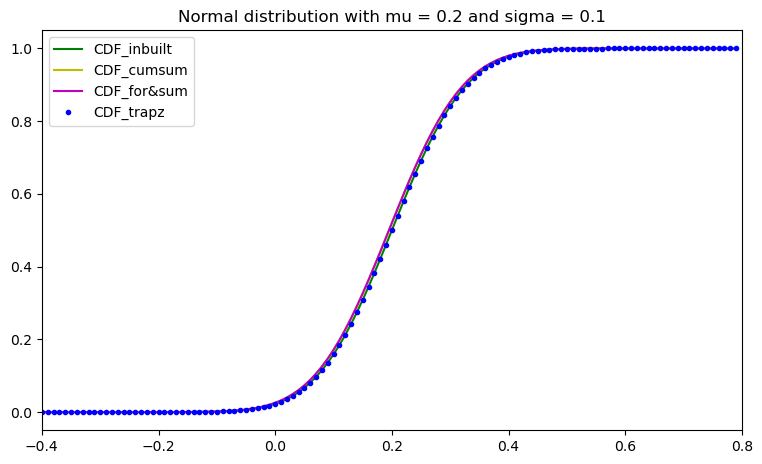

In [3]:
#!/usr/bin/python
#Assignment1_1.ipynb
#Parth Parakh
#purpose: Formative Assignment 1_1

#---------------------------------------------------------------------
#import modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
#----------------------------------------------------------------------
#Defining the parameters
mu = 0.2;             #mean
sigma = 0.1;          #standard deviation
a = -0.4;             #left truncation
b = 0.8;              #right truncation
ngrid = 120;          #number of grid intervals
#nsample = 1000000;

deltax = (b-a)/ngrid; #grid step
x = np.arange(a,b,deltax);

#Computing the PDF
phi =  ((x-mu)/sigma)**2;
R = np.exp((-0.5)*phi);
f1 =  (1/(np.sqrt(2*np.pi)*sigma))*R;

#Computing the CDF using cumsum (a)
F_a = np.cumsum(f1);
F_a = F_a*deltax;

#Computing the CDF using for and sum (b)
F_b = np.zeros(len(f1));
for i in range(1,len(f1)+1):
    F_b[i-1] = sum(f1[0:i]);
F_b *= deltax;

#Computing using trapz (c)
F_c = np.zeros(len(f1));
for i in range(1,len(f1)+1):
    F_c[i-1] = np.trapz(f1[0:i]);
F_c *= deltax;

#Computing c using a for loop and neither sum or trapz (d)
F_d = np.zeros(len(f1));
F_d[2] = 0.5*(f1[1]+f1[2]);
for i in range(3,len(f1)):
    F_d[i] = F_d[i-1]+0.5*(f1[i-1]+f1[i]);
F_d = F_d*deltax;

#Computing c without a for loop, applying a correction vector to cumsum (e)
F_e = np.cumsum(f1)-0.5*(f1[1]+f1);
F_e[1] = f1[1];
F_e = F_e*deltax;

#Compare with inbuilt PDF
#f = norm.pdf(x,mu,sigma);
F = norm.cdf(x,mu,sigma);

# Output the first 10 and the central 10 elements of the result vectors of a-e (f)

#formatted_F = [ '%.10f' % elem for elem in F ];
#print(formatted_F)
#^using formatted F we can confirm the results to be similar to those of Matlab. The results from below have higher precision

print(F[:10]);
print(F_a[:10]);
print(F_b[:10]);
print(F_c[:10]);
print(F_d[:10]);
print(F_e[:10]);

l = (int)(ngrid/2)-5; #typecasting to integer
r = (int)(ngrid/2)+4; #typecasting to integer
print(F[l:r]);
print(F_a[l:r]);
print(F_b[l:r]);
print(F_c[l:r]);
print(F_d[l:r]);
print(F_e[l:r]);

#Create Figure (g)
fig = plt.figure(figsize=(7,4), dpi=100)

#Add set of axes to figure
ax = fig.add_axes([0,0,1,1]) # left, bottom, width, height 

#Figure 1
#Plot on that set of axes
#ax.plot(x,f1,'r', label = 'PDF')
ax.plot(x,F,'g', label  = 'CDF_inbuilt')
ax.plot(x,F_a,'y',label = 'CDF_cumsum')
ax.plot(x,F_b,'m',label = 'CDF_for&sum')
ax.plot(x,F_c,'b.',label = 'CDF_trapz')
#ax.plot(x,f,'b.', label = 'PDF_inbuilt')
plt.legend()
ax.set_title('Normal distribution with mu = 0.2 and sigma = 0.1')

#Figure 2
#s = np.random.normal(mu, sigma,nsample);
#plt.hist(s,100,density=True, label = 'sampled', alpha=0.5)
#ax.plot(x, f1, 'r', label = 'PDF')
plt.xlim(a,b)
plt.legend()
plt.show()
